In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.preprocessing import OneHotEncoder
import statsmodels.formula.api as smf
import numpy as np

%matplotlib inline

In [2]:
#Read the data
Startup = pd.read_csv("50_Startups.csv")
Startup.head()




,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
Startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
print(Startup['State'].unique())

['New York' 'California' 'Florida']


In [5]:
Startup['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

# One-Hot encoding the categorical parameters using get_dummies() 

In [6]:
one_hot_encoded_Startup = pd.get_dummies(Startup, columns = ['State'])
print(one_hot_encoded_Startup)


    R&D Spend  Administration  Marketing Spend     Profit  State_California  \
0   165349.20       136897.80        471784.10  192261.83                 0   
1   162597.70       151377.59        443898.53  191792.06                 1   
2   153441.51       101145.55        407934.54  191050.39                 0   
3   144372.41       118671.85        383199.62  182901.99                 0   
4   142107.34        91391.77        366168.42  166187.94                 0   
5   131876.90        99814.71        362861.36  156991.12                 0   
6   134615.46       147198.87        127716.82  156122.51                 1   
7   130298.13       145530.06        323876.68  155752.60                 0   
8   120542.52       148718.95        311613.29  152211.77                 0   
9   123334.88       108679.17        304981.62  149759.96                 1   
10  101913.08       110594.11        229160.95  146121.95                 0   
11  100671.96        91790.61        249744.55  1442

In [7]:
Startups=one_hot_encoded_Startup
Startups

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [8]:
#Startups.info()

In [9]:
#check for missing values
Startups.isna().sum()

R&D Spend           0
Administration      0
Marketing Spend     0
Profit              0
State_California    0
State_Florida       0
State_New York      0
dtype: int64

In [10]:
Startups.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


In [11]:
Start=Startups.rename(columns={"R&D Spend":"R","Marketing Spend":"M","State_New York":"State_NewYork"})
Start

,R,Administration,M,Profit,State_California,State_Florida,State_NewYork
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


<AxesSubplot:>

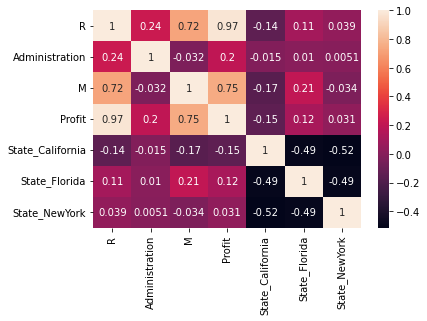

In [12]:
sns.heatmap(Start.corr(),annot=True)

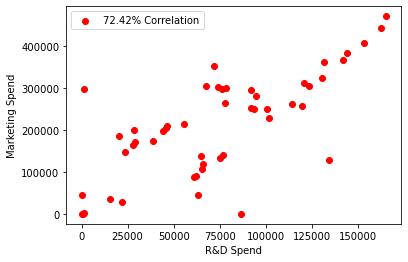

In [13]:
plt.scatter(Start["R"],Start["M"],color="Red",label="72.42% Correlation")
plt.xlabel("R&D Spend")
plt.ylabel("Marketing Spend")
plt.legend(loc="best")
plt.show()


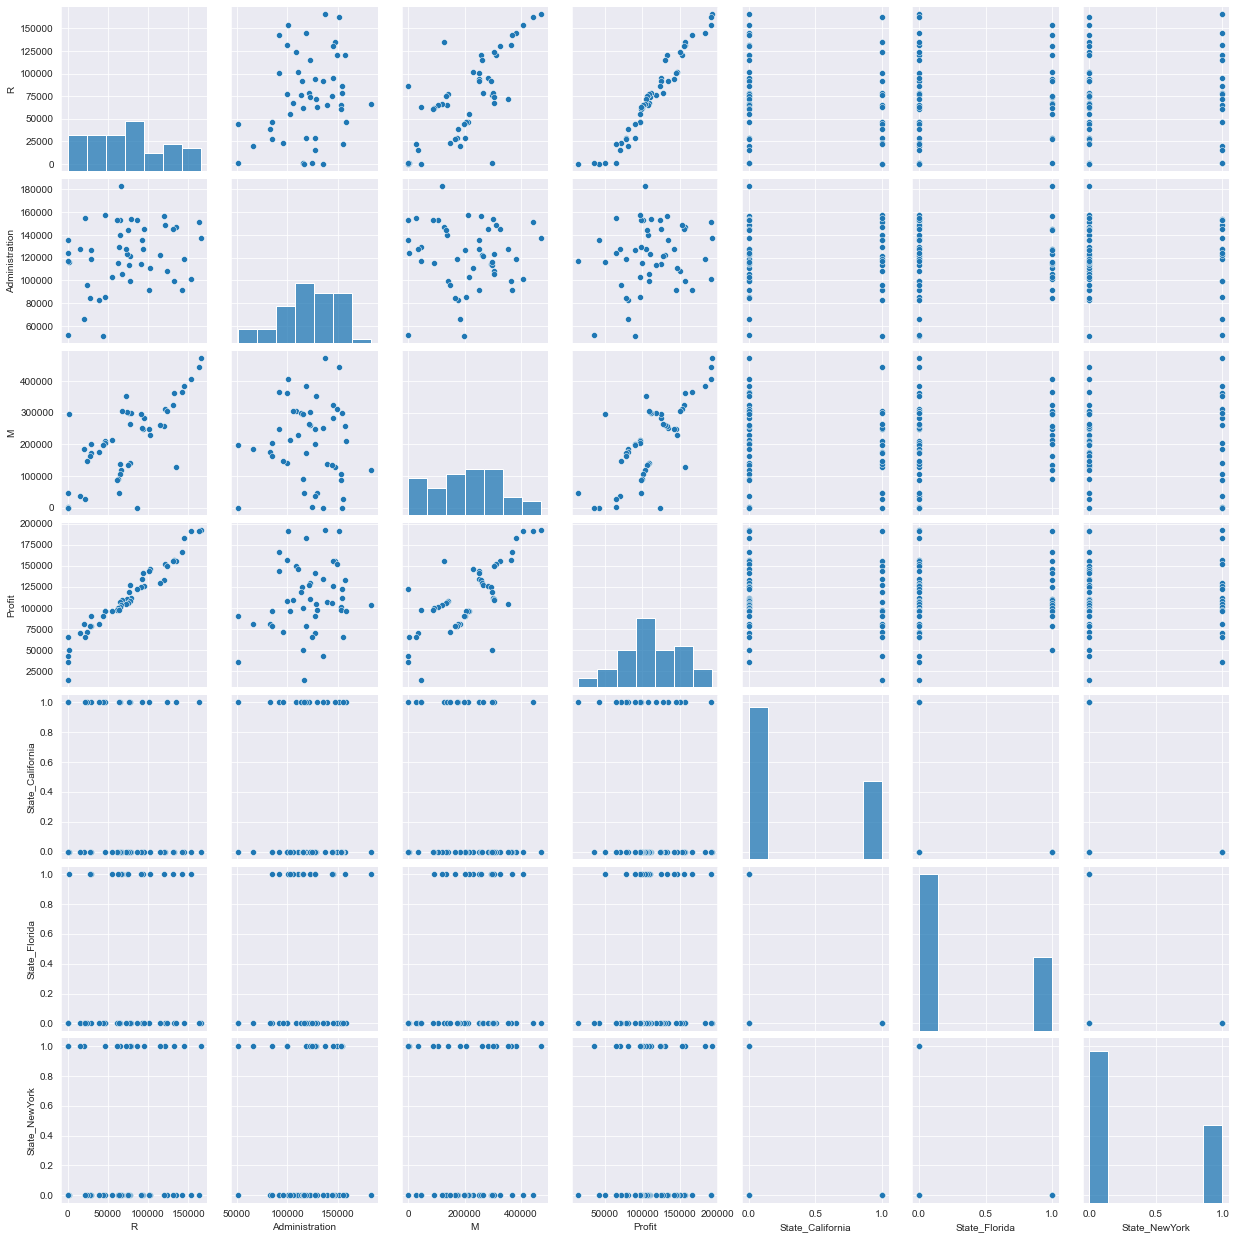

In [14]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(Start)

In [15]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols("Profit~R+Administration+M+State_California+State_Florida+State_NewYork",data=Start).fit()
model.summary()#+State_California+State_Florida+State_NewYork

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           1.34e-27
Time:                        23:42:49   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
R                    0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
M                    0.0270      0.017      1.574      0.123      -0.008       0.062
State_California  1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
State_Florida     1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
State_NewYork     1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     3.84e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.63e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Calculating VIF

In [16]:
#"""ypred =a1x1+a2x2+a3x3+a4x4+b
#ho:a1=0    #===> 0.814 
#h1:a1!=0"""  

In [17]:
rsq_R = smf.ols('R~Administration+M+State_California+State_Florida+State_NewYork',data=Start).fit().rsquared  
vif_R = 1/(1-rsq_R) # 19

rsq_Administration = smf.ols('Administration~M+R+State_California+State_Florida+State_NewYork',data=Start).fit().rsquared  
vif_Administration = 1/(1-rsq_Administration) # 625

rsq_M = smf.ols('M~R+Administration+State_California+State_Florida+State_NewYork',data=Start).fit().rsquared  
vif_M = 1/(1-rsq_M) #  624
rsq_State_California = smf.ols('State_California~R+Administration+State_Florida+State_NewYork',data=Start).fit().rsquared  
vif_State_California = 1/(1-rsq_State_California) 
rsq_State_Florida = smf.ols('State_Florida~R+Administration+State_California+State_NewYork',data=Start).fit().rsquared  
vif_State_Florida = 1/(1-rsq_State_California)
rsq_State_NewYork = smf.ols('State_NewYork~R+Administration+State_California+State_Florida',data=Start).fit().rsquared  
vif_State_NewYork = 1/(1-rsq_State_California) 

# Storing vif values in a data frame
d1 = {'Variables':['R','Administration','M','State_California','State_Florida','State_NewYork'],'VIF':[vif_R,vif_Administration,vif_M,vif_State_California,vif_State_Florida,vif_State_NewYork]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

#All the VIF values are less than 10 within the threshold.

C:\Users\Acer\AppData\Local\Temp\ipykernel_8492\3852113682.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif_State_California = 1/(1-rsq_State_California)
C:\Users\Acer\AppData\Local\Temp\ipykernel_8492\3852113682.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  vif_State_Florida = 1/(1-rsq_State_California)
C:\Users\Acer\AppData\Local\Temp\ipykernel_8492\3852113682.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  vif_State_NewYork = 1/(1-rsq_State_California)


,Variables,VIF
0,R,2.495511
1,Administration,1.177766
2,M,2.416797
3,State_California,inf
4,State_Florida,inf
5,State_NewYork,inf


# Treatment for multicollinearity

In [18]:
import statsmodels.formula.api as smf 
model3= smf.ols('Profit~R+Administration+M+State_California+State_Florida+State_NewYork',data=Start).fit()#ra,ma,rm
model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           1.34e-27
Time:                        23:42:50   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
R                    0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
M                    0.0270      0.017      1.574      0.123      -0.008       0.062
State_California  1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
State_Florida     1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
State_NewYork     1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     3.84e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.63e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [19]:
#As the P_value of Administration in model1 is high which influences to accept H0 i.e, the coefficient of administration is zero & R-squared value of model is high we consider model3. 

# Residual Analysis¶

In [20]:
model3.resid

0      -128.741365
1      2720.739894
2      8774.203265
3      9317.013809
4     -6089.193819
5     -6482.687120
6     -1976.782789
7     -4403.044651
8       577.026673
9     -5069.702529
10    10457.307408
11     8730.799217
12    12302.602193
13     6876.101014
14   -17091.732777
15   -16226.595515
16    10138.855472
17    -4715.039933
18    -4882.825742
19     7182.671589
20     1903.295561
21    -5888.485088
22    -4481.055137
23    -1389.806104
24    -4742.333453
25     5204.071081
26    -5031.761170
27    -9271.494028
28     1463.792613
29     -716.402030
30      308.579462
31     -133.736321
32    -1560.396605
33    -1282.438947
34     7738.095839
35     6059.500395
36    15285.097137
37      371.437779
38    11622.538393
39    -2679.216039
40     3477.163826
41     2842.518953
42      922.496288
43     9658.711782
44      615.182788
45    17337.715292
46    -6782.242679
47    -3908.502003
48   -13449.663082
49   -33503.638790
dtype: float64

# Test for Normality of Residuals (Q-Q Plot)

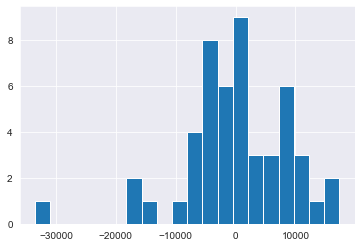

In [21]:
plt.hist(model3.resid,bins=20)
plt.show()

<Figure size 1440x576 with 0 Axes>

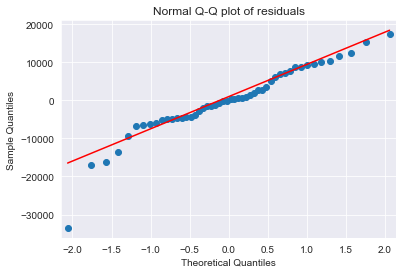

In [22]:
import statsmodels.api as sm
plt.figure(figsize=(20,8))
qqplot=sm.qqplot(model3.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

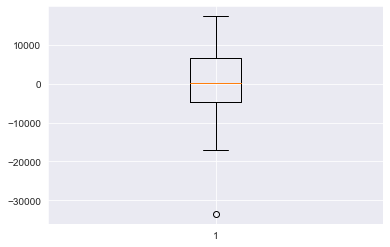

In [23]:
plt.boxplot(model3.resid)
plt.show()

In [24]:
# finding the 1st quartile
q1 = np.quantile(model3.resid, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(model3.resid, 0.75)
med = np.median(model3.resid)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

11407.460932022503 23783.142256997864 -21846.70147109215


In [25]:
outliers = model.resid[(model3.resid <= lower_bound) | (model.resid>= upper_bound)]
print('The following are the outliers in the boxplot:{}'.format(outliers))

The following are the outliers in the boxplot:49   -33503.63879
dtype: float64


In [26]:
outliers.index

Int64Index([49], dtype='int64')

In [27]:
y = Start


In [28]:
startup= y.drop(y.index[[outliers.index]],axis=0).reset_index()
startup

C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\indexes\base.py:5055: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,index,R,Administration,M,Profit,State_California,State_Florida,State_NewYork
0,0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [29]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             49 non-null     int64  
 1   R                 49 non-null     float64
 2   Administration    49 non-null     float64
 3   M                 49 non-null     float64
 4   Profit            49 non-null     float64
 5   State_California  49 non-null     uint8  
 6   State_Florida     49 non-null     uint8  
 7   State_NewYork     49 non-null     uint8  
dtypes: float64(4), int64(1), uint8(3)
memory usage: 2.2 KB


In [30]:
model03= smf.ols('Profit~R+Administration+M+State_California+State_Florida+State_NewYork',data=startup).fit()#ra,ma,rm
model03.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     216.6
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           2.51e-29
Time:                        23:43:01   Log-Likelihood:                -505.97
No. Observations:                  49   AIC:                             1024.
Df Residuals:                      43   BIC:                             1035.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.915e+04   4249.909      9.213      0.000    3.06e+04    4.77e+04
R                    0.7836      0.039     20.056      0.000       0.705       0.862
Administration      -0.0220      0.044     -0.505      0.616      -0.110       0.066
M                    0.0258      0.014      1.804      0.078      -0.003       0.055
State_California  1.422e+04   2081.663      6.833      0.000       1e+04    1.84e+04
State_Florida     1.266e+04   2276.728      5.561      0.000    8068.684    1.73e+04
State_NewYork     1.227e+04   2076.431      5.909      0.000    8082.828    1.65e+04
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.207
Skew:                           0.061   Prob(JB):                        0.902
Kurtosis:                       2.705   Cond. No.                     6.13e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.03e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Residual Plot for Homoscedasticity

In [31]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

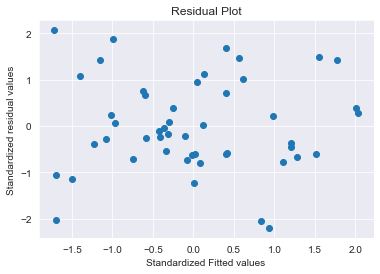

In [32]:
plt.scatter(get_standardized_values(model03.fittedvalues),
            get_standardized_values(model03.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [33]:
#There is no pattern found which satisfies the assumptions 

# Residual Vs Regressors¶

eval_env: 1


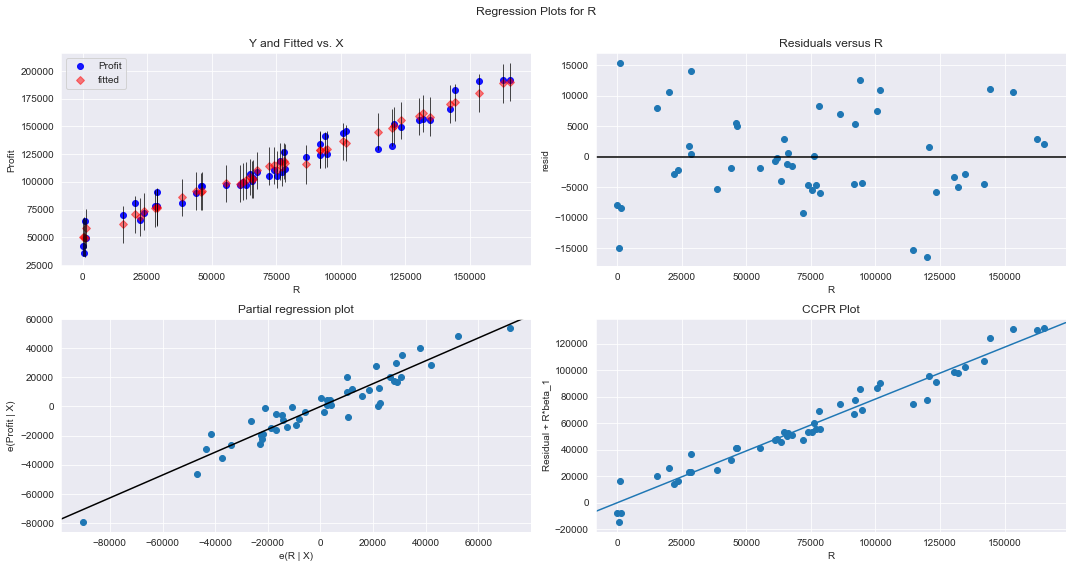

In [34]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model03, "R", fig=fig)
plt.show()


eval_env: 1


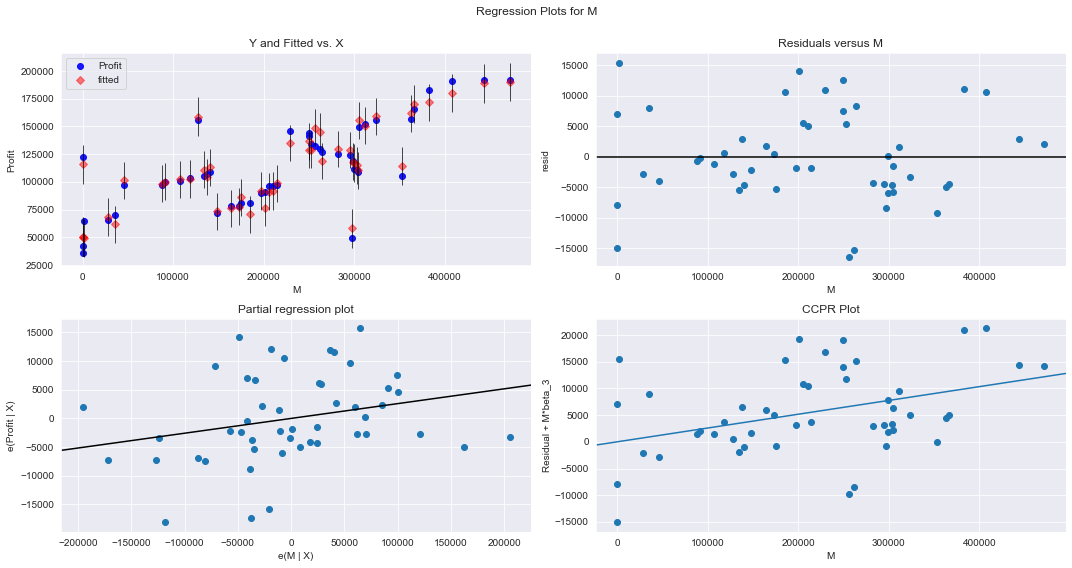

In [35]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model03, "M", fig=fig)
plt.show()


eval_env: 1


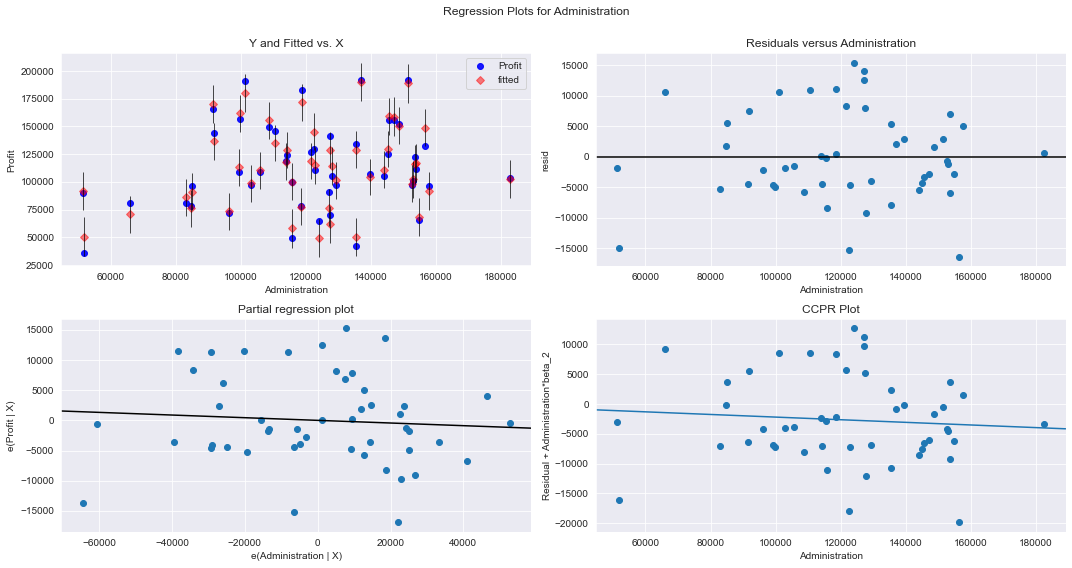

In [36]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model03, "Administration", fig=fig)
plt.show()


eval_env: 1


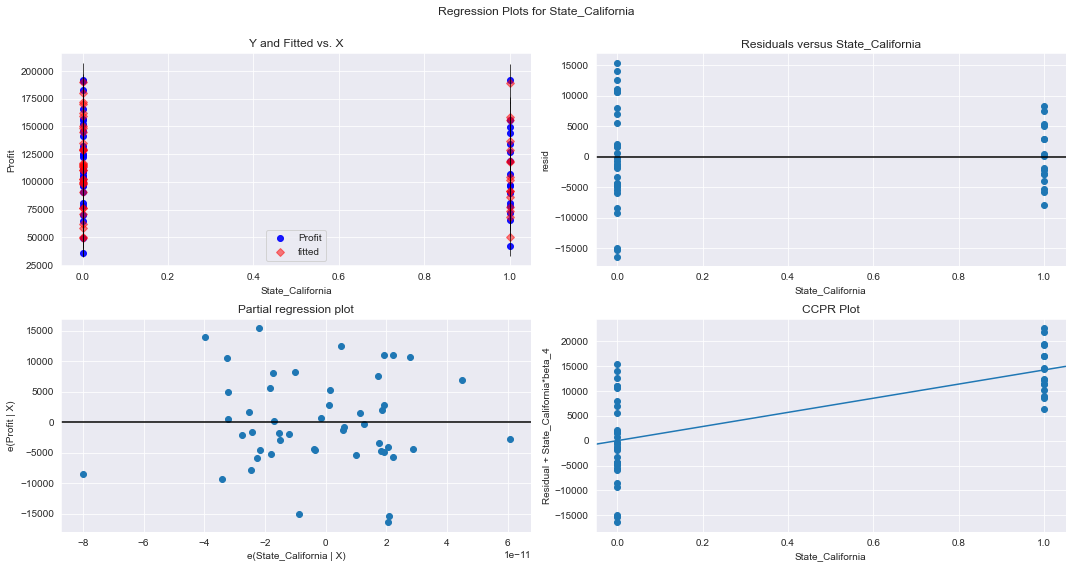

In [37]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model03, "State_California", fig=fig)
plt.show()


eval_env: 1


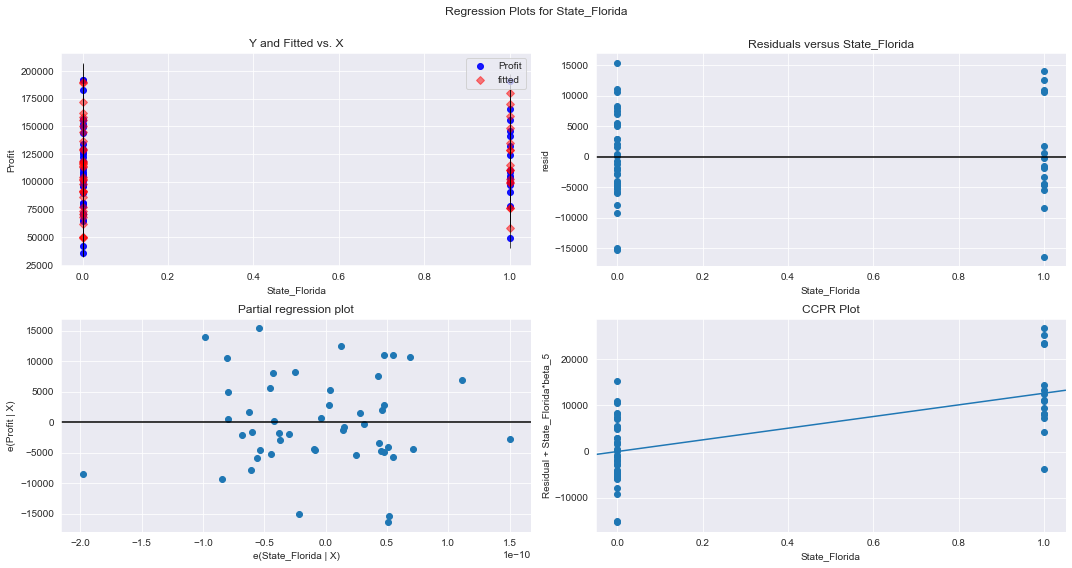

In [38]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model03, "State_Florida", fig=fig)
plt.show()


eval_env: 1


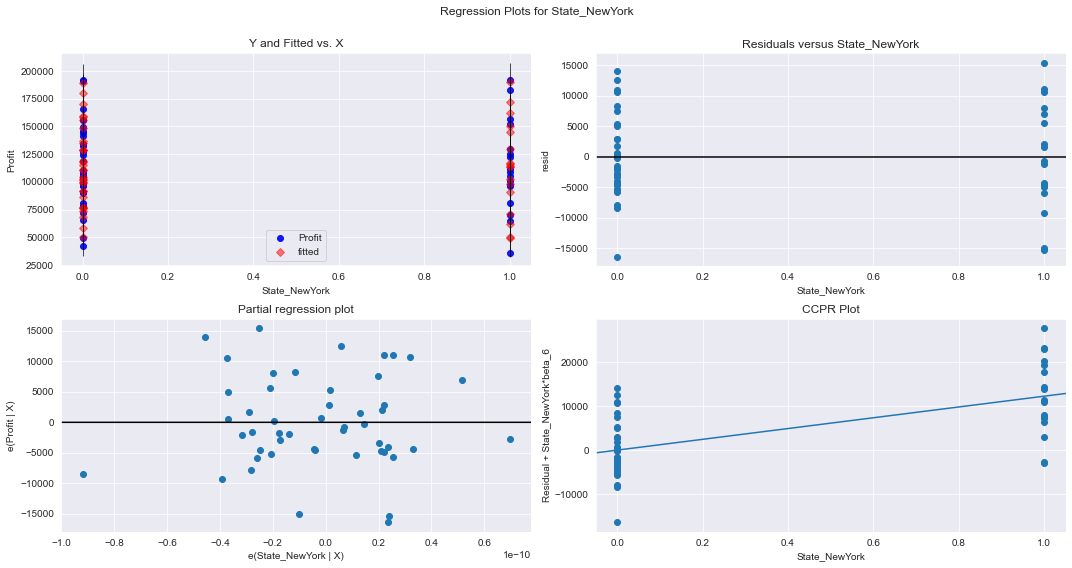

In [39]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model03, "State_NewYork", fig=fig)
plt.show()


In [40]:
#As Administration is less correlated with the model03.predict() we remove Administration.

In [83]:
new_model= smf.ols('Profit~R+M+State_California+State_Florida+State_NewYork',data=startup).fit()#ra,ma,rm
new_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     275.3
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           1.60e-30
Time:                        00:32:54   Log-Likelihood:                -506.11
No. Observations:                  49   AIC:                             1022.
Df Residuals:                      44   BIC:                             1032.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.722e+04   1805.972     20.607      0.000    3.36e+04    4.09e+04
R                    0.7760      0.036     21.721      0.000       0.704       0.848
M                    0.0281      0.013      2.082      0.043       0.001       0.055
State_California  1.359e+04   1647.590      8.249      0.000    1.03e+04    1.69e+04
State_Florida     1.197e+04   1812.249      6.608      0.000    8322.556    1.56e+04
State_NewYork     1.165e+04   1659.753      7.019      0.000    8305.166     1.5e+04
==============================================================================
Omnibus:                        0.123   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.940   Jarque-Bera (JB):                0.292
Skew:                           0.093   Prob(JB):                        0.864
Kurtosis:                       2.670   Cond. No.                     5.77e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.88e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [42]:
#There is no correlation found between the attributes and the residuals values.

# Model Deletion Diagnostics


# Detecting Influencers/Outliers

# Cook’s Distance

In [72]:
model_new12_influence = new_model.get_influence()
(c, _) =model_new12_influence.cooks_distance

In [73]:
K=5
N=49
3*(K+1)/N

0.3673469387755102

In [74]:
len(startup)

49

In [75]:
 np.round(c, 3)

array([0.002, 0.004, 0.054, 0.05 , 0.004, 0.006, 0.007, 0.004, 0.   ,
       0.009, 0.032, 0.016, 0.032, 0.005, 0.085, 0.055, 0.016, 0.005,
       0.004, 0.043, 0.   , 0.012, 0.006, 0.001, 0.004, 0.001, 0.01 ,
       0.045, 0.   , 0.001, 0.   , 0.   , 0.006, 0.   , 0.004, 0.009,
       0.061, 0.   , 0.051, 0.005, 0.   , 0.002, 0.001, 0.022, 0.004,
       0.107, 0.097, 0.03 , 0.087])

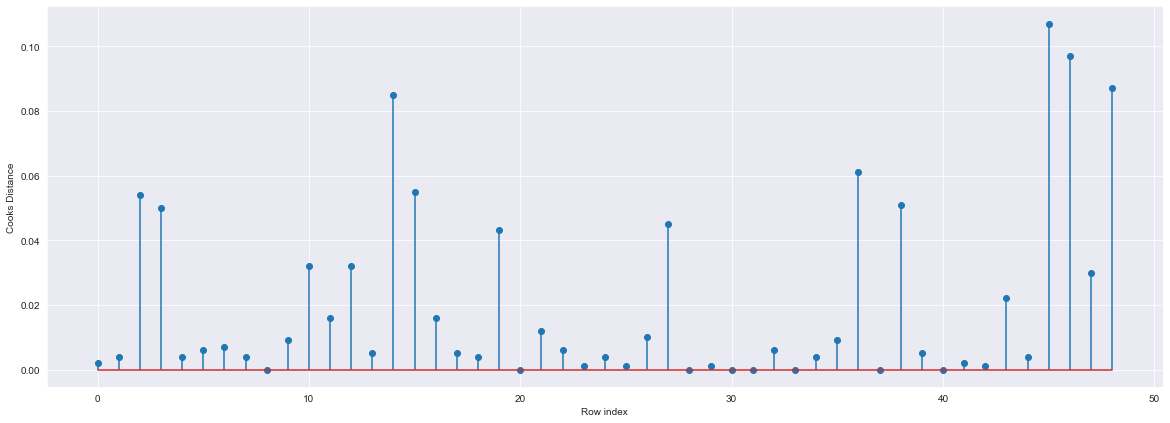

In [76]:
#Plot the influencers values using stem plot
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(startup)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [77]:
np.where(c>0.367)

(array([], dtype=int64),)

In [78]:
(np.argmax(c),np.max(c))

(45, 0.10748483729783995)

In [79]:
#No outliers found.

# Improving the model

In [81]:
Start_new=startup.drop(['Administration','index'],axis=1)
Start_new

,R,M,Profit,State_California,State_Florida,State_NewYork
0,165349.20,471784.10,192261.83,0,0,1
1,162597.70,443898.53,191792.06,1,0,0
2,153441.51,407934.54,191050.39,0,1,0
3,144372.41,383199.62,182901.99,0,0,1
4,142107.34,366168.42,166187.94,0,1,0
5,131876.90,362861.36,156991.12,0,0,1
6,134615.46,127716.82,156122.51,1,0,0
7,130298.13,323876.68,155752.60,0,1,0
8,120542.52,311613.29,152211.77,0,0,1
9,123334.88,304981.62,149759.96,1,0,0


# Build Model

In [82]:
final_model= smf.ols('Profit~R+M+State_California+State_Florida+State_NewYork',data = Start_new).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     275.3
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           1.60e-30
Time:                        00:30:21   Log-Likelihood:                -506.11
No. Observations:                  49   AIC:                             1022.
Df Residuals:                      44   BIC:                             1032.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.722e+04   1805.972     20.607      0.000    3.36e+04    4.09e+04
R                    0.7760      0.036     21.721      0.000       0.704       0.848
M                    0.0281      0.013      2.082      0.043       0.001       0.055
State_California  1.359e+04   1647.590      8.249      0.000    1.03e+04    1.69e+04
State_Florida     1.197e+04   1812.249      6.608      0.000    8322.556    1.56e+04
State_NewYork     1.165e+04   1659.753      7.019      0.000    8305.166     1.5e+04
==============================================================================
Omnibus:                        0.123   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.940   Jarque-Bera (JB):                0.292
Skew:                           0.093   Prob(JB):                        0.864
Kurtosis:                       2.670   Cond. No.                     5.77e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.88e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [62]:
#final_model.predict(Start[["R","M"]])
final_model.predict()

array([190417.14482284, 189440.44481153, 179709.320606  , 171652.8659084 ,
       169741.81534265, 161385.81271473, 158850.19738452, 159390.93994996,
       151151.92978265, 155073.77620517, 134705.99429588, 135937.38505769,
       129040.59059721, 129284.36351258, 149464.64050968, 145082.26348016,
       118764.93627954, 130250.58474521, 128665.41702393, 115925.09011393,
       118363.34746991, 118109.34710105, 115124.35649665, 110150.7638914 ,
       112596.68445546, 104858.75434941, 111407.33731697, 114735.41812863,
       103762.00890527, 102782.06375524,  99855.3744989 ,  98783.01216762,
       101304.7187518 ,  98278.69169616,  92751.18100807,  90341.931756  ,
        77080.24199411,  90536.36546029,  69765.59214944,  85641.18259422,
        77971.64532241,  75452.94470259,  73307.71198693,  61896.22015296,
        68812.58546178,  49696.3067689 ,  58553.95217264,  50807.98434416,
        49287.32199677])